In [1]:
import os, sys, csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [3]:
sys.path.append(MODULES_PATH)

In [4]:
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer

In [5]:
metrics_handler = ExperimentSuitMetrics(os.path.join(METRICS_PATH, "mnist_baal"))

In [13]:
dtypes = {
    "epoch": int,
    "train_loss": float,
    "train_accuracy": float,
    "test_loss": float,
    "test_accuracy": float,
    "labeled_data_size": int
}

df_random = MetricsTransformer.load("1_random_1337", metrics_handler, dtype=dtypes)
df_bald = MetricsTransformer.load("1_bald_1337", metrics_handler, dtype=dtypes)
df_entropy = MetricsTransformer.load("1_entropy_1337", metrics_handler, dtype=dtypes)
df_std_mean = MetricsTransformer.load("1_std_mean_1337", metrics_handler, dtype=dtypes)
df_max_var = MetricsTransformer.load("1_max_var_1337", metrics_handler, dtype=dtypes)

In [14]:
df_random.insert(0, "method", "Random")
df_bald.insert(0, "method", "BALD")
df_entropy.insert(0, "method", "Max. Entropy")
df_std_mean.insert(0, "method", "Std. Mean")
df_max_var.insert(0, "method", "Max. Var. Ratios")

In [15]:
merged = pd.concat([
    df_random,
    df_bald,
    df_entropy,
    df_std_mean,
    df_max_var
], sort=True)

Text(0, 0.5, 'Eval. Loss')

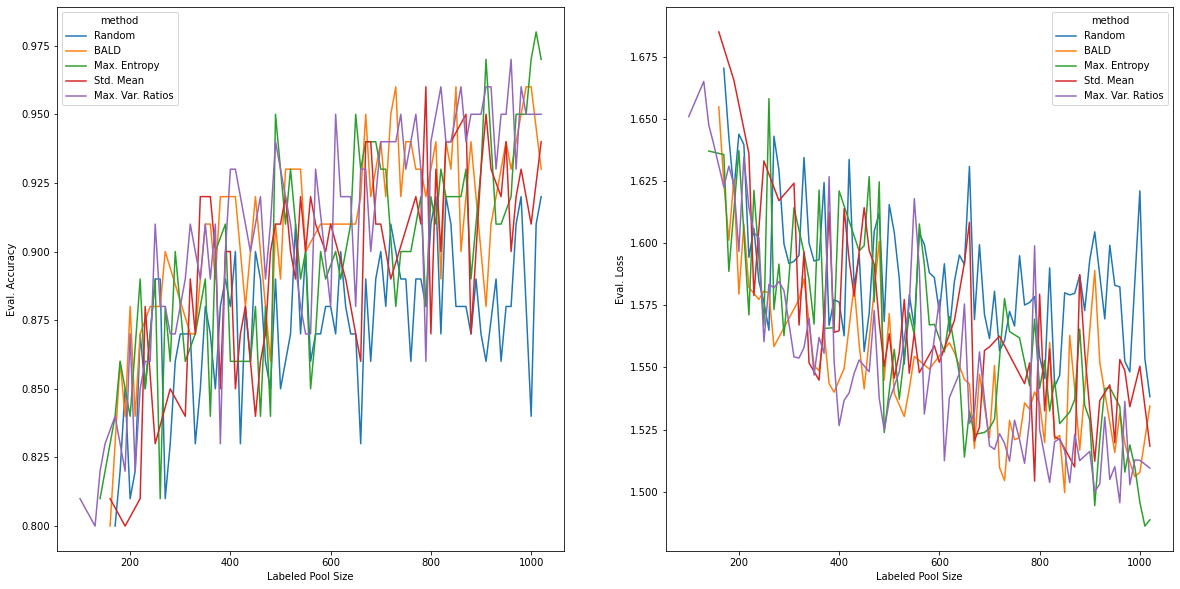

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

acc_filter = merged["test_accuracy"] >= 0.8
sns.lineplot(ax=ax[0], data=merged[acc_filter], x="labeled_data_size", y="test_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")

sns.lineplot(ax=ax[1], data=merged[acc_filter], x="labeled_data_size", y="test_loss", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Loss")